In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer


import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
import cv2
from skimage import data
from skimage.color import rgb2hsv

EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3


In [ ]:
image_list=[]
label_list=[]


In [ ]:
import os
path1='/content/drive/MyDrive/RiceDiseases-DataSet-master/Bacterial leaf blight/orig'
path2='/content/drive/MyDrive/RiceDiseases-DataSet-master/blast/Orig'
path3='/content/drive/MyDrive/RiceDiseases-DataSet-master/brownspot/orig'

folder_1=os.listdir(path1)
folder_2=os.listdir(path2)
folder_3=os.listdir(path3)

for image in folder_1:
  im=Image.open(path1+'/'+image)
  img=im.resize((width,height))
  img_hsv = np.zeros((height,width,3))
  img_hsv = cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2HSV)


  
  image_list.append(img_to_array(img_hsv))
  label_list.append('Bacerial_leaf_blight')
  

In [ ]:
for image in folder_2:
  im=Image.open(path2+'/'+image)
  img=im.resize((width,height))
  img_hsv = np.zeros((height,width,3))
  img_hsv = cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2HSV)


  
  image_list.append(img_to_array(img_hsv))
  label_list.append('blast')

In [ ]:
for image in folder_3:
  im=Image.open(path3+'/'+image)
  img=im.resize((width,height))
  img_hsv = np.zeros((height,width,3))
  img_hsv = cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2HSV)


  #img_hsv = rgb2hsv(im)
  image_list.append(img_to_array(img_hsv))
  label_list.append('brownspot')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


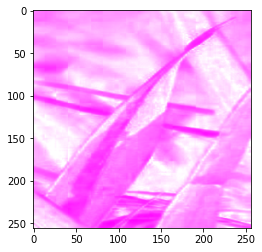

In [ ]:
img=image_list[2]
plt.imshow(img)
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer=LabelBinarizer()
image_labels=label_binarizer.fit_transform(label_list)

n_classes = len(label_binarizer.classes_)

In [ ]:
np_image_list=np.array(image_list,dtype=np.float16)/225.0

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(np_image_list,image_labels,test_size=0.2,random_state=42)

In [ ]:
#trying for hypertuning

from keras.optimizers import SGD
learning_rate = 0.1
decay_rate = learning_rate / EPOCHS
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)


In [ ]:
from keras.optimizers import Adam
from keras.applications import InceptionV3

model = InceptionV3()
#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

96116736/96112376 [==============================] - 1s 0us/step
[INFO] training network...


In [ ]:
from keras.optimizers import RMSprop

rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)


In [ ]:
#hyper tuning
from keras.layers.normalization import BatchNormalization

#def create_model(init_mode='uniform'):
"""model = Sequential()
inputShape = (height, width, depth)
chanDim=-1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape,kernel_initializer="uniform"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
#model.add(MaxPooling2D(pool_size=(2, 2))) #I have added
#model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
    
    #model compile
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
              metrics=['accuracy'])
    #return model"""
model = Sequential()
inputShape = (height, width, depth)
chanDim=-1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
    
    #model compile
"""model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
              metrics=['accuracy']) """




"model.compile(loss='categorical_crossentropy',\n             optimizer=RMSprop(),\n              metrics=['accuracy']) "

In [ ]:
#trying for hypertuning


learning_rate = 0.1
decay_rate = learning_rate / EPOCHS
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)


In [ ]:
from keras.optimizers import Adam
#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [ ]:
history = model.fit(
    x_train, y_train, batch_size=BS,
    validation_data=(x_test, y_test),
    epochs=EPOCHS, verbose=1
    )

Epoch 1/25
7/7 [==============================] - 45s 6s/step - loss: 3.5823 - accuracy: 0.4374 - val_loss: 185990.7969 - val_accuracy: 0.3393
Epoch 2/25
7/7 [==============================] - 42s 6s/step - loss: 6.7443 - accuracy: 0.6590 - val_loss: 56650.5898 - val_accuracy: 0.3571
Epoch 3/25
7/7 [==============================] - 42s 6s/step - loss: 3.1457 - accuracy: 0.7060 - val_loss: 29458.8262 - val_accuracy: 0.3393
Epoch 4/25
7/7 [==============================] - 42s 6s/step - loss: 3.4597 - accuracy: 0.7676 - val_loss: 14084.2549 - val_accuracy: 0.3393
Epoch 5/25
7/7 [==============================] - 42s 6s/step - loss: 2.5370 - accuracy: 0.8306 - val_loss: 5938.2163 - val_accuracy: 0.3571
Epoch 6/25
7/7 [==============================] - 42s 6s/step - loss: 3.2870 - accuracy: 0.8460 - val_loss: 4377.4028 - val_accuracy: 0.3393
Epoch 7/25
7/7 [==============================] - 42s 6s/step - loss: 1.8031 - accuracy: 0.9049 - val_loss: 1221.5938 - val_accuracy: 0.3214
Epoch 8/

In [ ]:
import numpy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers.normalization import BatchNormalization

seed=7
numpy.random.seed(seed)
batch_size = 32
epochs = 25

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

NameError: ignored

In [ ]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

NameError: ignored

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(scores)
print(scores[0],scores[1])
#print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
2/2 [==============================] - 3s 1s/step - loss: 21.1120 - accuracy: 0.4821
[21.11204719543457, 0.4821428656578064]
21.11204719543457 0.4821428656578064
